# Data Visualization with Python Studio

At this point, you should already have connected with the rest of your group to divide up who is going to do what. 

Use this notebook to create your visualizations.

Below, we set up the dataframe with the Goodreads dataset for you. 

If you run this cell, you may get an error that some lines were skipped. Do not worry about that! 

For this studio, we want to focus on creating an effective visualization.

In [2]:
# Here is the setup of the dataframe. Feel free to use .info() or .head() to 
## get a better understanding of what is inside the dataframe!

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("books.csv", on_bad_lines='skip')

years = []

for y in df['publication_date']:
    date = y.split("/")
    years.append(date[2])

df["year"] = years

df.head()


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004


With your dataframe set up, time to start creating visualizations!

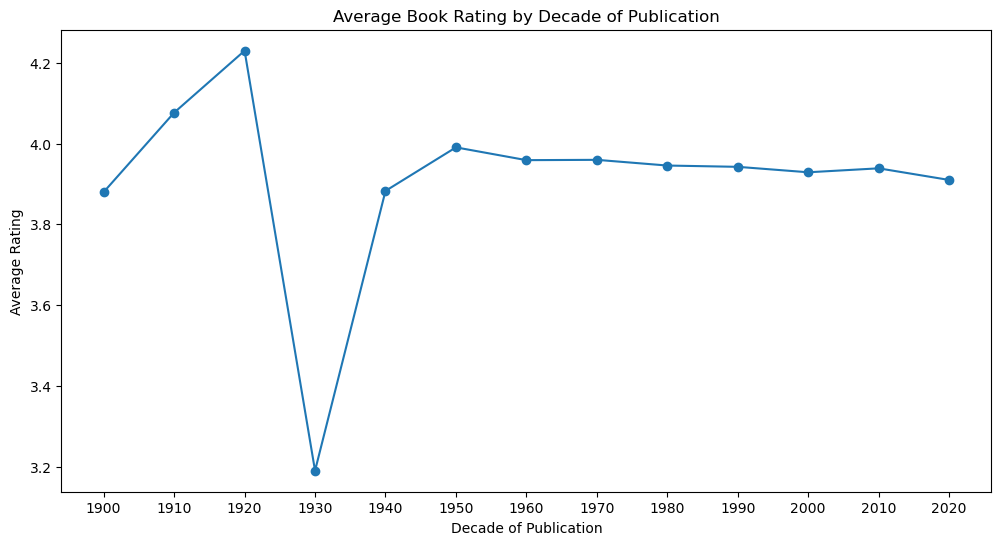

In [9]:
# Convert 'year' to numeric (coerce errors to NaN)
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop rows where 'year' is NaN (optional, if any invalid years exist)
df = df.dropna(subset=['year'])

# Convert to integer type
df['year'] = df['year'].astype(int)

# Create a 'decade' column
df['decade'] = (df['year'] // 10) * 10

# Average rating by decade
avg_rating_by_decade = df.groupby('decade')['average_rating'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(avg_rating_by_decade['decade'], avg_rating_by_decade['average_rating'], marker='o')
plt.title('Average Book Rating by Decade of Publication')
plt.xlabel('Decade of Publication')
plt.ylabel('Average Rating')
plt.xticks(avg_rating_by_decade['decade'])
plt.show()



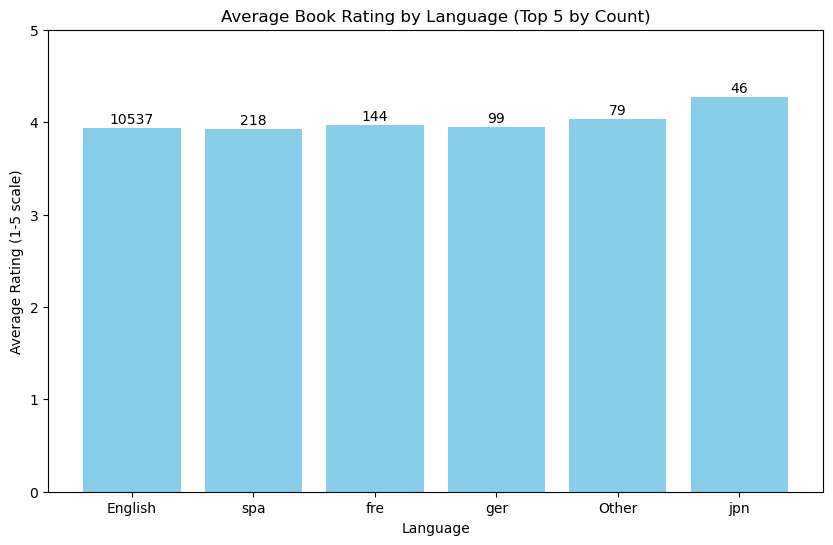

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV
df = pd.read_csv("books.csv", on_bad_lines='skip')

# Ensure numeric columns
df['ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce').fillna(0)
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce').fillna(0)

# Combine English variants
english_codes = ['eng', 'en-US', 'en-GB', 'en-CA']
df['language_code'] = df['language_code'].replace(english_codes, 'English')

# Count books per language
language_counts = df['language_code'].value_counts()

# Get top 5 languages
top5_languages = language_counts.head(5).index.tolist()

# Create 'Other' category
df['language_group'] = df['language_code'].apply(lambda x: x if x in top5_languages else 'Other')

# Compute average rating per language group
avg_rating_by_lang = df.groupby('language_group')['average_rating'].mean().reset_index()

# Sort by count of books
avg_rating_by_lang['count'] = df.groupby('language_group')['language_group'].count().values
avg_rating_by_lang = avg_rating_by_lang.sort_values(by='count', ascending=False)

# Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(avg_rating_by_lang['language_group'], avg_rating_by_lang['average_rating'], color='skyblue')
plt.title('Average Book Rating by Language (Top 5 by Count)')
plt.ylabel('Average Rating (1-5 scale)')
plt.xlabel('Language')
plt.ylim(0, 5)

# Add count labels above bars
for idx, row in avg_rating_by_lang.iterrows():
    plt.text(row['language_group'], row['average_rating'] + 0.05, f"{row['count']}", ha='center')

plt.show()
